In [1]:
import pylab
import requests
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random as rn
import sklearn.datasets as sk
import sklearn.metrics as sklm
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as grp
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

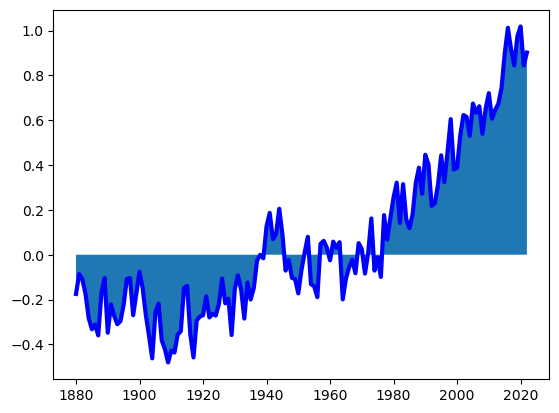

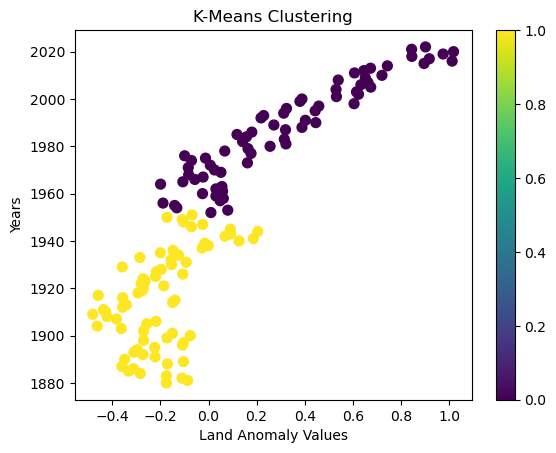

In [2]:
response = requests.get("https://global-warming.org/api/temperature-api")

df = json_normalize(response.json(), 'result')
timeDizi = []
landDizi = []
toplamLand = []
years = []
for i in range(0,len(response.json()["result"])):
    timeDizi.append(response.json()["result"][i]["time"])
    timeDizi[i] = timeDizi[i][:-3:]
    landDizi.append(response.json()["result"][i]["land"])
dataset = pd.DataFrame({"Time": timeDizi, "Land": landDizi})

for year in range(1880,2023):
    toplam = 0
    years.append(year)
    dataset = pd.DataFrame({"Time": timeDizi, "Land": landDizi})
    dataset = dataset[dataset["Time"] == str(year)]
    for i in dataset["Land"].values:
        toplam += float(i)
    toplamLand.append(toplam / len(dataset[dataset["Time"] == str(year)]))

df = pd.DataFrame({"time": years, "land": toplamLand})

y = df["land"]
x = df["time"]

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", lw=3)
ax.fill_between(x, 0, y)

plt.show()

X_train, X_test, y_train, y_test = train_test_split (df, y, test_size=0.2, random_state=12345)


def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df, 2)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['land'],df['time'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Land Anomaly Values')
ax.set_ylabel('Years')
plt.colorbar(scatter)
plt.show()

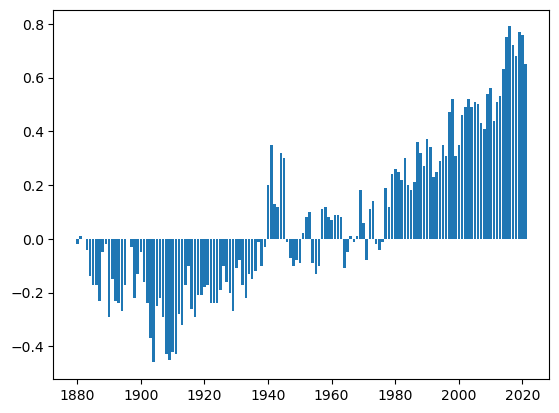

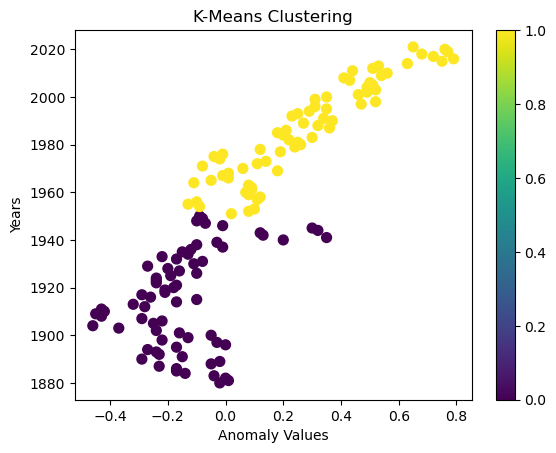

In [3]:
df = pd.read_csv("C:/Users/Giray/Desktop/anomaly.csv")
y = df["Anomaly"]
zeroTemp = 0
sum = 0
for i in df["Anomaly"].values:
    if(i == 0):
        zeroTemp += 1
    else:
        sum += i

plt.bar(df["Year"],df["Anomaly"])
plt.show()




def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df, 2)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['Anomaly'],df['Year'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Anomaly Values')
ax.set_ylabel('Years')
plt.colorbar(scatter)

plt.show()


Which Country (Firce Letter Must Be Upper Case): World


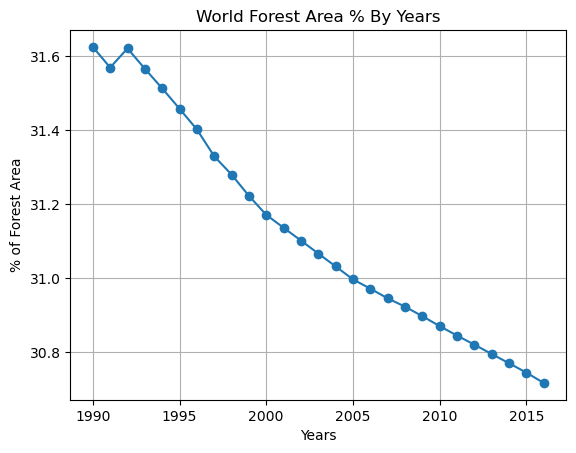

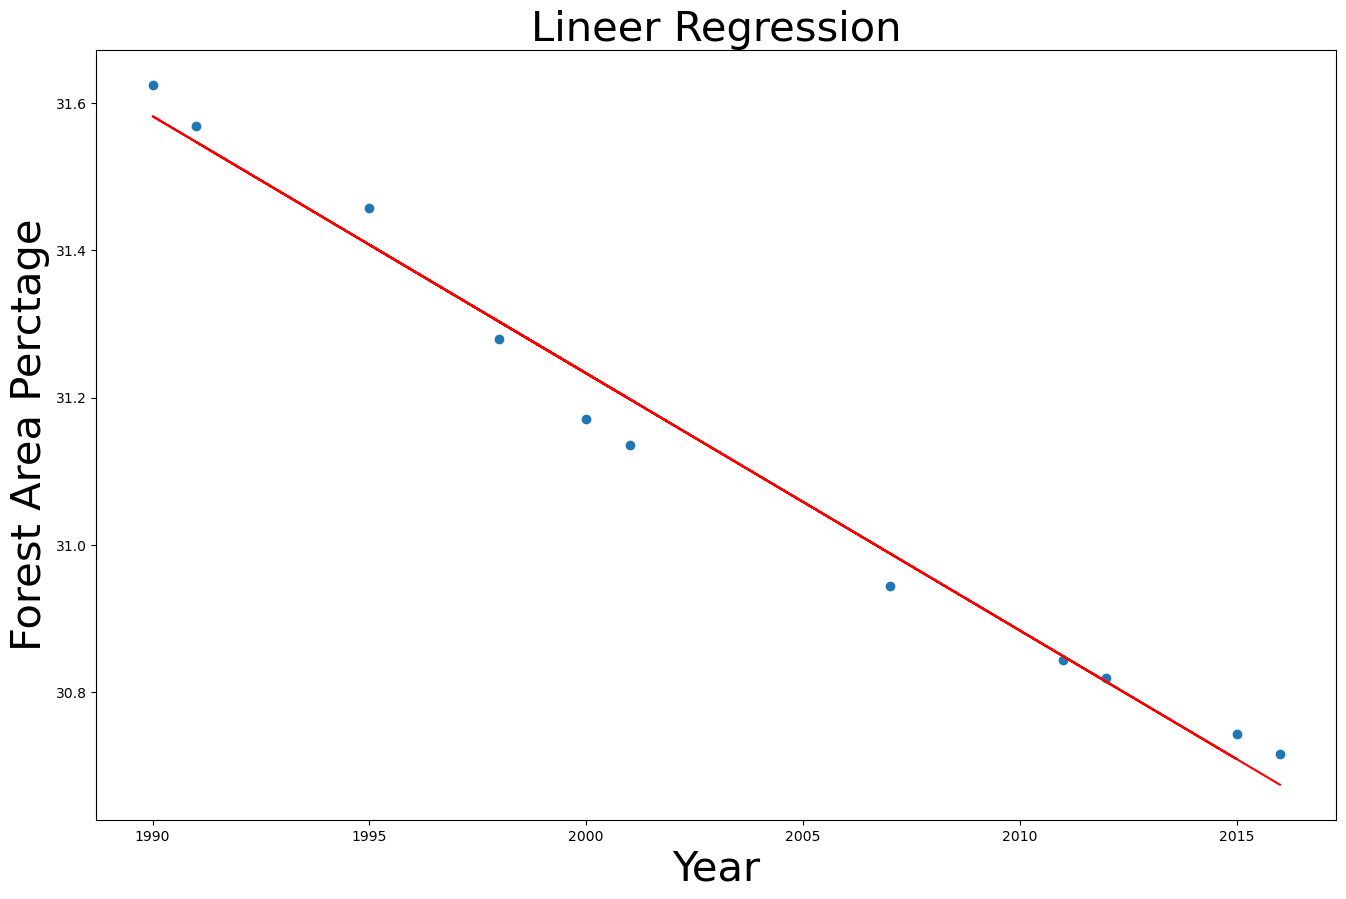

In [4]:
country = input("Which Country (Firce Letter Must Be Upper Case): ")
df = pd.read_csv("C:/Users/Giray/Desktop/forest.csv")

countryData = df[df["Country Name"] == country]

years = []
meanArea = []
for i in range(1990,2017):
    years.append(i)
    meanArea.append(float(countryData[str(i)].values))

dataSet = pd.DataFrame({"Years":years, "Forest Area":meanArea})

"""GRAPHIC"""
plt.plot(dataSet["Years"], dataSet["Forest Area"], marker="o")
plt.xlabel("Years")
plt.ylabel("% of Forest Area")
plt.title(f"{country} Forest Area % By Years")
plt.grid(True)
plt.show()

"""REGRESSION"""
x=dataSet["Years"].values.reshape(-1,1)
y=dataSet["Forest Area"].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

reg = LinearRegression().fit(x_test,y_test)
prediction = reg.predict(x_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(x_test,y_test)
ax.plot(x_test, prediction, color="red")
plt.xlabel('Year', fontsize=30)
plt.ylabel('Forest Area Perctage', fontsize=30)
plt.title("Lineer Regression",fontsize=30)
plt.show()

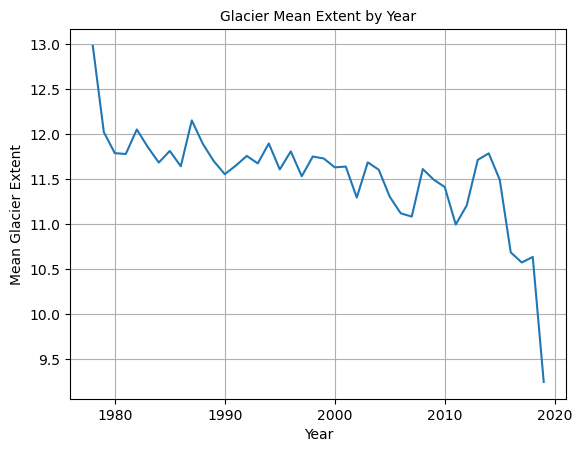

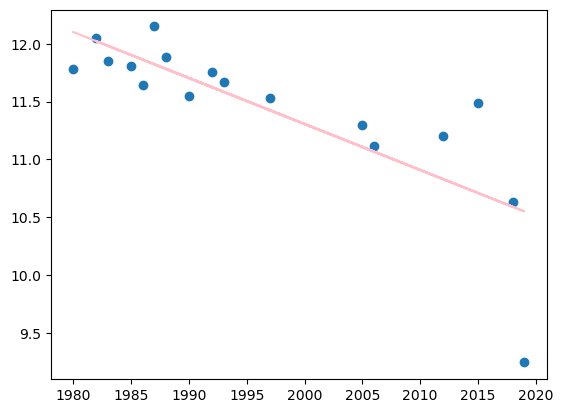

In [5]:
meanExtent = []
for year in range(1978,2020):
    df = pd.read_csv("C:/Users/Giray/Desktop/seaice.csv")
    toplam = 0
    df = df[df["Year"]==year]
    for i in df["Extent"].values:
        toplam += i
    meanExtent.append(toplam/len(df))
years= []
for i in range(1978,2020):
    years.append(i)

"""GRAPHIC"""
extentSet = pd.DataFrame({"Years":years, "Mean Extent":meanExtent})
plt.plot(extentSet['Years'], extentSet['Mean Extent'])
plt.title('Glacier Mean Extent by Year', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mean Glacier Extent', fontsize=10)
plt.grid(True)
plt.show()

"""REGRESSION"""
x=extentSet["Years"].values.reshape(-1,1)
y=extentSet["Mean Extent"].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
reg = LinearRegression().fit(x_test,y_test)
prediction = reg.predict(x_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
fig, ax = plt.subplots()
ax.scatter(x_test,y_test)
ax.plot(x_test, prediction, color="pink")
plt.show()